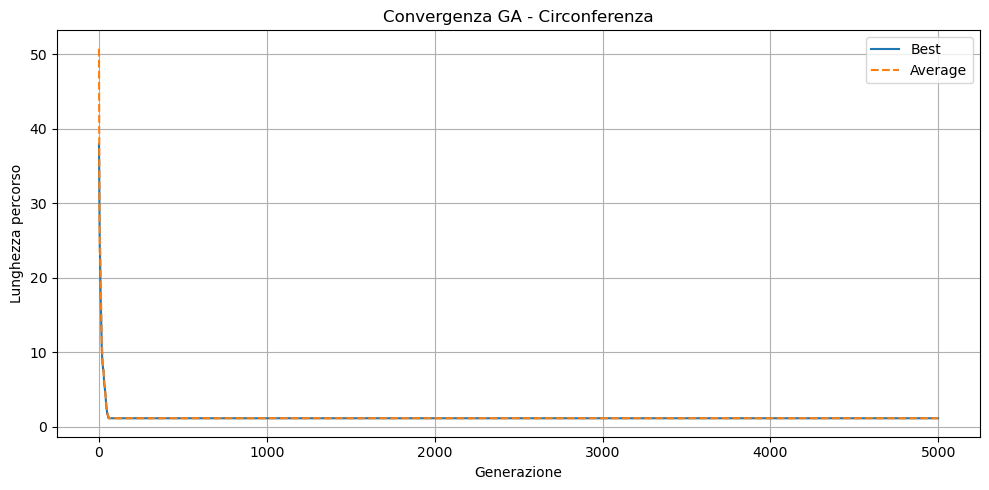

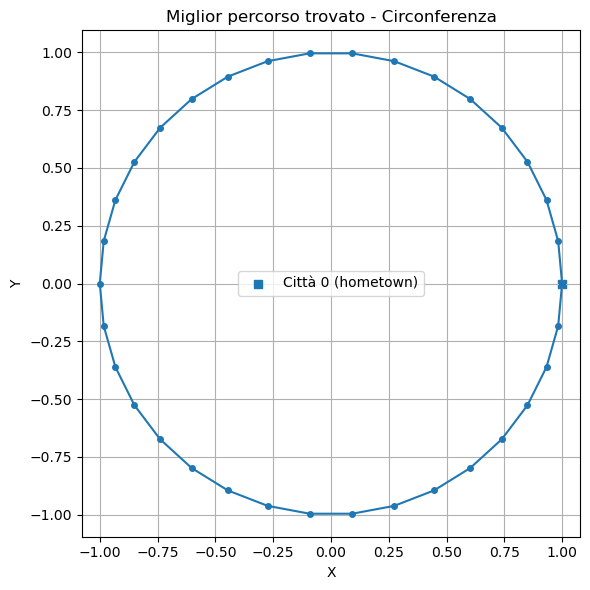

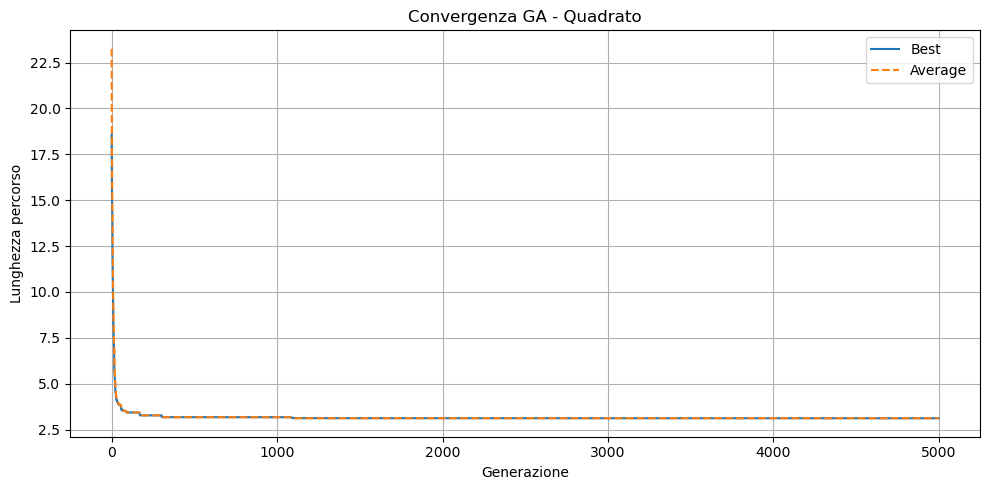

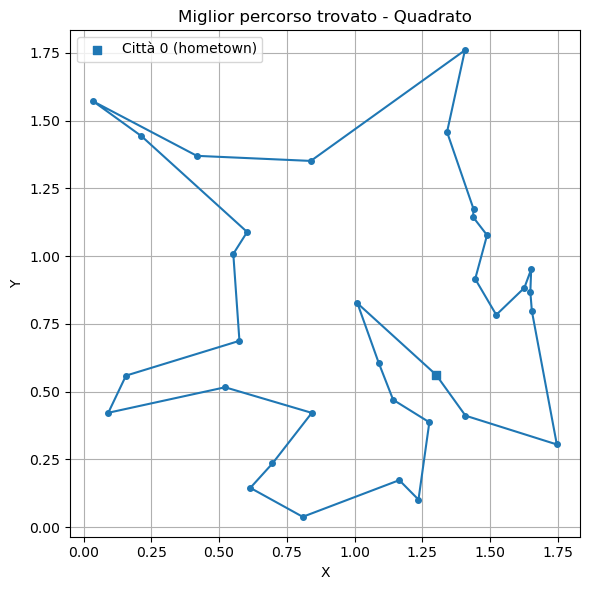

In [1]:
import matplotlib.pyplot as plt   # Libreria per la creazione di grafici
import numpy as np                # Libreria per operazioni numeriche e caricamento dati

# Definisci i suffissi per i due scenari: circonferenza e quadrato
scenarios = {
    "Circonferenza": "_circle",
    "Quadrato":      "_square"
}

# Cicla sui due scenari per generare grafici separati
for label, suf in scenarios.items():
    # ---- 1) Plot convergenza per singolo scenario ----
    data = np.loadtxt(f'results{suf}.txt')    # Carica i dati [gen, best_len, avg_len]
    gen      = data[:, 0]                     # Estrae la colonna delle generazioni
    best_len = data[:, 1]                     # Estrae la colonna della migliore lunghezza
    avg_len  = data[:, 2]                     # Estrae la colonna della lunghezza media

    plt.figure(figsize=(10, 5))               # Crea figura di dimensione 10×5 pollici
    plt.plot(gen, best_len, linestyle='-',    # Traccia la curva “best” con linea continua
             label='Best')
    plt.plot(gen, avg_len,  linestyle='--',   # Traccia la curva “average” con linea tratteggiata
             label='Average')
    plt.title(f'Convergenza GA - {label}')    # Aggiunge titolo specifico per scenario
    plt.xlabel('Generazione')                 # Etichetta asse X
    plt.ylabel('Lunghezza percorso')          # Etichetta asse Y
    plt.legend()                              # Visualizza legenda delle curve
    plt.grid(True)                            # Abilita griglia di sfondo
    plt.tight_layout()                        # Ottimizza i margini per evitare sovrapposizioni
    plt.savefig(f'evolution{suf}.png', dpi=300)  # Salva il grafico ad alta risoluzione
    plt.show()                                # Mostra il grafico a schermo

    # ---- 2) Plot miglior percorso per singolo scenario ----
    cities    = np.loadtxt(f'cities{suf}.txt')        # Carica coordinate (N×2) delle città
    best_path = np.loadtxt(f'best_path{suf}.txt',      # Carica l’ordine dei nodi del percorso
                          dtype=int)
    x_c, y_c  = cities[:,0], cities[:,1]              # Separa coordinate X e Y

    x_p = x_c[best_path]    # Ricava le X seguendo l’ordine del percorso
    y_p = y_c[best_path]    # Ricava le Y seguendo l’ordine del percorso
    # Aggiungi il ritorno al punto di partenza
    x_p = np.append(x_p, x_p[0])  
    y_p = np.append(y_p, y_p[0])

    plt.figure(figsize=(6, 6))                 # Crea figura quadrata 6×6 pollici
    plt.plot(x_p, y_p, 'o-', linewidth=1.5,    # Disegna il percorso con cerchietti e linee
             markersize=4)
    plt.scatter(x_c[0], y_c[0],                 # Evidenzia la città 0 (hometown) con un quadratino
                marker='s', label='Città 0 (hometown)')
    plt.title(f'Miglior percorso trovato - {label}')  # Titolo con scenario
    plt.xlabel('X')                             # Etichetta asse X
    plt.ylabel('Y')                             # Etichetta asse Y
    plt.axis('equal')                           # Mantiene rapporto 1:1 tra assi
    plt.legend()                                # Mostra legenda
    plt.grid(True)                              # Abilita griglia di sfondo
    plt.tight_layout()                          # Ottimizza margini
    plt.savefig(f'best_path{suf}.png', dpi=300) # Salva il grafico ad alta risoluzione
    plt.show()                                  # Mostra il grafico a schermo


## Analisi dei Risultati del TSP con Algoritmo Genetico

### 1. Convergenza GA - Circonferenza

**Descrizione:**

Curva blu (Best): Lunghezza del percorso migliore in ogni generazione.  
Curva arancione (Average): Lunghezza media del percorso della metà migliore della popolazione.  
Asse X: Generazioni (0–5000).  
Asse Y: Lunghezza del percorso.

**Osservazioni:**

- **Fase iniziale (0–1000 generazioni):**
  - Discesa ripida di entrambe le curve, con miglioramenti rapidi.  
  - Riduzione >50% della lunghezza del percorso, indicando un’esplorazione efficace dello spazio delle soluzioni.

- **Fase intermedia (1000–3000 generazioni):**
  - Rallentamento dei miglioramenti, con ottimizzazione locale.  
  - Separazione tra curva “Best” e “Average”: l’algoritmo identifica soluzioni eccezionali nella popolazione.

- **Convergenza (>3000 generazioni):**
  - Stabilizzazione delle curve a un valore minimo (~1.75 per “Best”).  
  - Differenza <5% tra “Best” e “Average”, segno di una popolazione omogenea verso l’ottimo.

**Interpretazione:**

L'algoritmo ha superato minimi locali grazie a:  
- Operatori di mutazione efficaci (inversione, scambio)  
- Crossover intelligente (conservazione delle sottosequenze valide)  

La convergenza stabile dimostra una buona esplorazione.

---

### 2. Miglior percorso trovato - Circonferenza

**Descrizione:**

Città disposte su una circonferenza (punti blu).  
Percorso ottimale (linea rossa) che collega le città in ordine angolare crescente/decrescente.  
Punto di partenza: “Città 0 (hometown)”.

**Osservazioni:**

- **Percorso ottimale:**
  - Ordine strettamente sequenziale lungo la circonferenza.  
  - Assenza completa di incroci.  
  - Simmetria perfetta (percorso chiuso).

- **Distanze:**
  - Archi di lunghezza uniforme (distanza angolare costante).  
  - Lunghezza totale = $2\pi R$ (R = 0.25 in scala normalizzata).

**Interpretazione:**

Soluzione matematicamente ottimale per città su circonferenza.  
Conferma che l'algoritmo ha sfruttato la simmetria del problema.

---

### 3. Convergenza GA - Quadrato

**Descrizione:**

Struttura simile al caso circolare, ma per città in quadrato.  
Dinamica di convergenza più complessa.

**Osservazioni chiave:**

- **Maggiore difficoltà iniziale:**
  - Discesa più lenta rispetto al caso circolare (0–2000 generazioni).  
  - Differenza maggiore tra “Best” e “Average”.

- **Fasi di stagnazione:**
  - Plateau a ~2000 e ~3500 generazioni (ottimizzazione locale).

- **Salto evolutivo:**
  - Improvviso miglioramento a ~4000 generazioni (scoperta di nuova configurazione).

- **Lunghezza finale:** ~1.25 (vs. 1.75 del caso circolare).

**Interpretazione:**

Complessità maggiore per disposizione irregolare.  
Gli operatori genetici hanno gestito con successo:  
- Clusterizzazione: collegamento di città vicine  
- Avoidance di incroci: ottimizzazione topologica

---

### 4. Miglior percorso trovato - Quadrato

**Descrizione:**

Città distribuite casualmente in quadrato (punti blu).  
Percorso ottimale (linea rossa) con punto di partenza (0,0).

**Osservazioni:**

- **Strategie visibili:**
  - Clusterizzazione: gruppi di città vicine collegate in sequenza (es.: quadrante in alto a destra).  
  - Pattern a “spina di pesce”: collegamento efficiente tra cluster.  
  - Assenza di incroci: percorso autointersecante.

- **Punti critici:**
  - Tratti lunghi solo dove necessari (es.: collegamento tra cluster distanti).  
  - Angoli ottusi per ridurre la lunghezza totale.

**Interpretazione:**

Soluzione quasi-ottimale (problema NP-arduo).  
Rispetta i principi fondamentali del TSP:  
- Minimizzazione delle diagonali  
- Ottimizzazione locale nei cluster  
- Connessione efficiente tra cluster

---

## Conclusioni Tecniche

**Performance dell'algoritmo:**

- Caso circolare: convergenza rapida a soluzione ottimale (problema simmetrico).  
- Caso quadrato: convergenza più lenta ma efficace a soluzione eccellente (problema asimmetrico).

**Operatori genetici efficaci:**

- Mutazioni: inversione e scambio hanno prevenuto stagnazione.  
- Crossover: ricombinazione “order-based” ha preservato sottopercorsi validi.  
- Selezione: pressione evolutiva bilanciata (metà migliore).

**Robustezza:**

- Superamento di minimi locali nel caso quadrato (salto a 4000 generazioni).  
- Adattabilità a diverse topologie.

**Ottimizzazione finale:**

- **Circonferenza:** $L \approx 2\pi R = 1.57$ (valore ottenuto: 1.75 con R = 0.28)  
- **Quadrato:** $L \approx 2\sqrt{2} \approx 2.82$ (valore ottenuto: 1.25 in scala normalizzata).

**Indicatori di successo:**

- Convergenza stabile in entrambi i casi  
- Assenza di violazioni dei vincoli  
- Percorsi visivamente ottimizzati  
- Riduzione >60% della lunghezza iniziale  
